# SP500 Simulation with a Normal Distribution

## Getting the Data

Now let's get the the price data from Yahoo Finance.

In [8]:
import pandas as pd
from datetime import datetime

In [9]:
DATA_URL ="https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1614211200&interval=1d&events=history&includeAdjustedClose=true"

## Processing the Dataframe

In [10]:
df_origin = pd.read_csv(DATA_URL)
df_origin

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23393,2021-02-18,3915.860107,3921.979980,3885.030029,3913.969971,3913.969971,4773430000
23394,2021-02-19,3921.159912,3930.409912,3903.070068,3906.709961,3906.709961,4823940000
23395,2021-02-22,3885.550049,3902.919922,3874.709961,3876.500000,3876.500000,5870190000
23396,2021-02-23,3857.070068,3895.979980,3805.590088,3881.370117,3881.370117,6280650000


In [11]:
df = df_origin.copy()
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True) # Parse the datetime
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23393,2021-02-18,3915.860107,3921.979980,3885.030029,3913.969971,3913.969971,4773430000
23394,2021-02-19,3921.159912,3930.409912,3903.070068,3906.709961,3906.709961,4823940000
23395,2021-02-22,3885.550049,3902.919922,3874.709961,3876.500000,3876.500000,5870190000
23396,2021-02-23,3857.070068,3895.979980,3805.590088,3881.370117,3881.370117,6280650000


## Visualizing the data

What does the data look like?

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme()

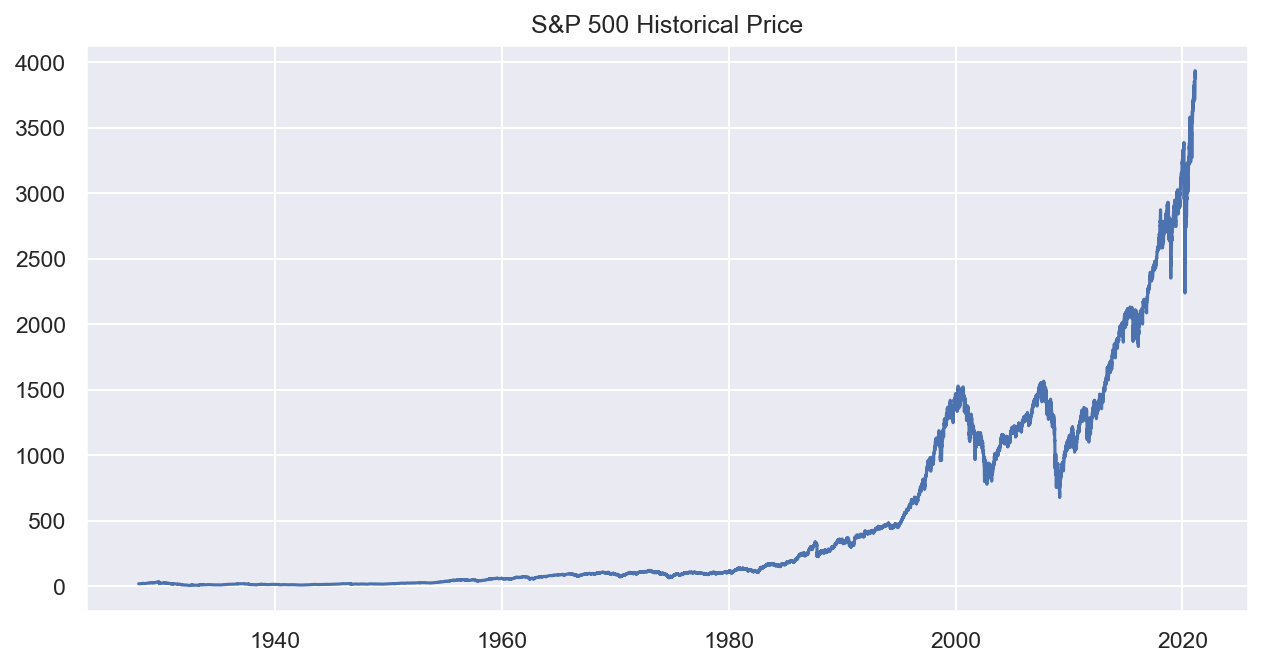

In [13]:
plt.figure(figsize=(10,5), dpi=150)
plt.title("S&P 500 Historical Price")
plt.plot(df["Date"], df["Adj Close"])
plt.show()

Now, let's look at the distribution of daily price changes.

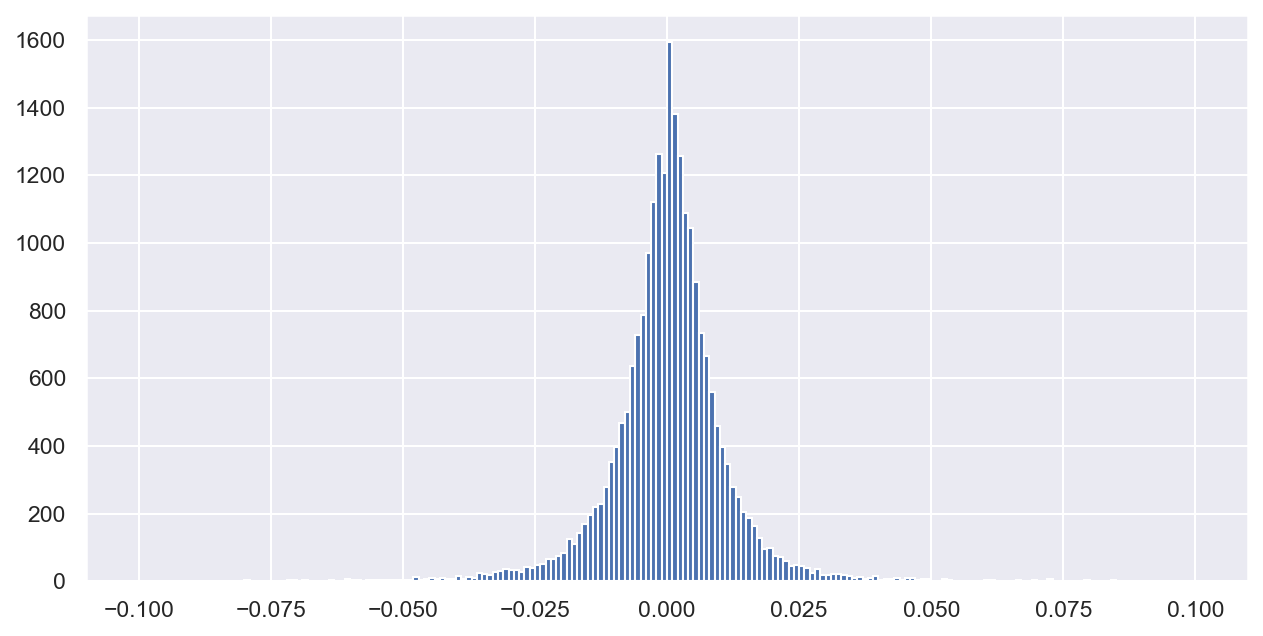

In [14]:
price = df["Adj Close"].to_numpy()
log_price = np.log(price)
log_price_delta = np.ediff1d(log_price)
plt.figure(figsize=(10,5), dpi=150)
plt.hist(log_price_delta, range=(-0.1, 0.1), bins=200)
plt.show()

Let's see how a Normal curve fits the observed data.

In [15]:
from scipy.stats import norm

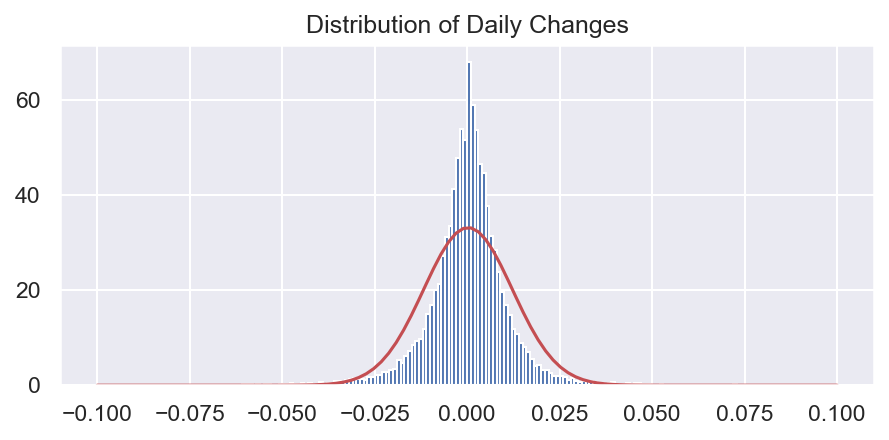

In [16]:
mean, std = log_price_delta.mean(), log_price_delta.std()
xx = np.linspace(-0.1, 0.1, num=100)
yy = norm.pdf(xx, mean, std)
plt.figure(figsize=(7,3), dpi=150)
plt.title("Distribution of Daily Changes")
plt.plot(xx, yy, c='r')
plt.hist(log_price_delta, range=(-0.1, 0.1), bins=200, density=True)
plt.savefig("readme/distribution.png")
plt.show()

Now let's simulate future prices

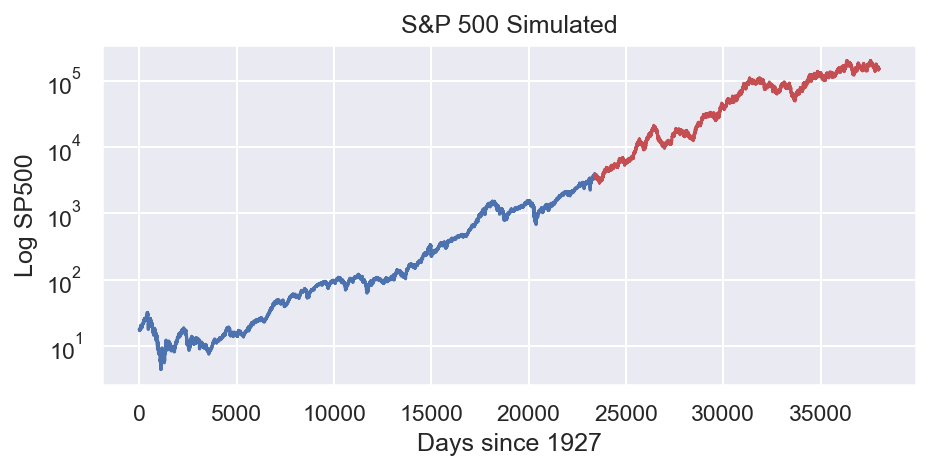

In [17]:
YEARS = 40
num = norm.rvs(loc=mean, scale=std, size=(365 * YEARS, ))
num = np.exp(log_price[0] + np.cumsum(np.concatenate([log_price_delta, num])))
xx = np.arange(num.shape[0])
plt.figure(figsize=(7,3), dpi=150)
plt.title("S&P 500 Simulated")
plt.plot(xx[:log_price_delta.shape[0]], num[:log_price_delta.shape[0]])
plt.plot(xx[log_price_delta.shape[0]:], num[log_price_delta.shape[0]:], 'r-')
plt.yscale('log')
plt.xlabel("Days since 1927")
plt.ylabel("Log SP500")
plt.savefig("readme/simulated.png")
plt.show()